# Lab 5: Sensing Part 2
### EECS 16B: Designing Information Devices and Systems II, Spring 2023

Updated by Mia Mirkovic (2020)

Updated by Rafael Calleja (2021)

Updated by Steven Lu, Kaitlyn Chan (2021)

Updated by Steven Lu (2022)

Updated by Megan Zeng, Mingyang Wang, and Shrey Aeron (2022)

Updated by Megan Zeng (2023)

## Table of Contents

* [Part 0: Before you Begin](#part0)
* [Part 1: A Treble-some Color Organ](#part1)
* [Part 2: Notch Filter](#part2)
* [Part 3: Checkoff](#checkoff)
* [Part 4: Midterm Lab Report Questions](#part4)


# <span style="color:navy">Introduction</span>
-----
Now that we've built the micboard circuitry, we can convert your voice into an electrical signal for the Arduino to read and work with. In the previous lab, we added a filter to pass through frequencies corresponding to human speech for later phases of the project. In this week's lab, we will further filter other frequencies in order to create a "color organ".

## Lab Note
* [Lab Note](https://eecs16b.org/lab/notes/lab_note5.pdf)

Review the lab note. The lab note provides a technical review of the concepts covered in lab as well as theoretical connections. **You should read the lab notes before your lab section.** They serve as a review and will be helpful as a reference during section.


## Pre-Lab

Complete the pre-lab assignment before doing the lab. Submit your answers to the Gradescope assignment "[\[Lab\] Pre-Lab 5: Sensing Part 2](https://www.gradescope.com/courses/484565/assignments/2702640)." Please make sure that you submit to the correct assignment. Pre-Lab 5 is due on **Sunday, March 5 at 11:59pm**. No late submissions will be accepted.

## Help Request Form
Use this [form](https://eecs16b.org/lab-help) to request help in your debugging / conceptual needs.

<a id='part0'></a>
# <span style="color:navy">Part 0: Before you Begin</span>
-----
### 0.1. Frequency Response of Speaker-Mic Board System
Before we begin the lab, please copy over `freq_Vpp` into the code block below. This was the dictionary of values for the speaker-microphone frequency response that you recorded in Lab 4. We will use this to analyze the frequency response of our joint speaker-microphone and filter system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import * 
%matplotlib inline

Vpp =  [0.6, 1, 1.2, 1.8, 2.1, 2.5, 3.5, 4.8, 4.9, 5.1, 3, 3.4, 4, 4.2, 4.5, 2.5, 0.8]


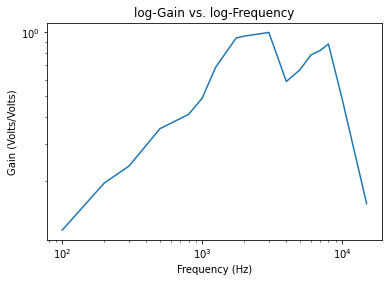

In [2]:
# TODO: Copy your values into freq_Vpp from lab 4
freq_Vpp = {
    100: 0.6,
    200: 1,
    300: 1.2,
    500: 1.8, 
    800: 2.1, 
    1000: 2.5, 
    1250: 3.5, 
    1750: 4.8, 
    2000: 4.9,  
    3000: 5.1, 
    4000: 3, 
    5000: 3.4, 
    6000: 4, 
    7000: 4.2, 
    8000: 4.5,
    10000: 2.5,
    15000: 0.8
}
freq = sorted(list(freq_Vpp.keys()))
assert len(freq) == 17, "Ensure that you didn't remove any of the frequences :pandacop:"

Vpp = [freq_Vpp[f] for f in freq] 
print("Vpp = ", Vpp)

# We do not have a measurable input signal Vin, so we normalize the maximum of the frequency response to 1.
gain = np.array(Vpp)/max(Vpp)

plt.loglog(freq, gain)
plt.title('log-Gain vs. log-Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Volts/Volts)')
plt.show()

### 0.2. Tune Your Mic Board
#### Materials:
- Speaker (phone, laptop, etc.)

Before every lab that uses the mic board, you will need to retune the mic board in case the potentiometer was bumped or otherwise rotated from its "tuned" position. An abridged version of the micboard tuning steps from Lab 4 is shown below.


#### Tasks:
1. Power your regulator with 9V using the +25V channel on your DC power supply. Make sure to set the current limit to 0.1A! **DO NOT plug in your batteries**

2. Connect your oscilloscope probe to $V_{out}$ on your mic board. Add a **peak-to-peak** and **frequency** measurement to the oscilloscope.

3.  **Play a pure tone using a [tone generator](https://www.szynalski.com/tone-generator/) in the range (1500 - 2000 Hz)** on your phone at a reasonable volume (leaning towards the soft side). Do NOT use a Youtube video!

4. Turn the potentiometer on the mic board **(CW: decrease amplitude | CCW: increase amplitude)** using a screwdriver (or your student ID card) until you see a sine wave with a **peak-to-peak of around 1.5V to 2V** on the oscilloscope.
    - If you tuned your micboard previously, you shouldn't need to turn the potentiometer a significant amount.

5. **Verify that the frequency of the measured sine wave matches the tone from your phone, and that the sine wave is centered at around 2.5V.**

## Project Breadboard Layout
At this point, your breadboard should contain all of the components in the project breadboard layout. In this lab, you will be building a notch filter and a high-pass filter but removing them after checkoff, so **make sure you have enough unallocated space available for this lab**.

<img width="700px" src="images/suggested_layout.jpg">

<img width="500px" src="images/color_organ.png">

<a id='part1'></a>
# <span style="color:navy">Part 1: A Treble-some Color Organ</span>

-----
The frequency range for the mic board is more than just the lower frequencies, so in this part, we will be building a high-pass filter to pass frequencies higher than 6000 - 8000 Hz.

#### Materials
- Capacitors
- Resistors
- Speaker
- Oscilloscope probes

## Tasks

### 1.1. Design and Build the High-Pass Filter Circuit

1. Recall the circuit diagram and cutoff frequency equation $f_c$ for a first-order high pass RC filter.

2. Choose values for $R$ and $C$ such that your cutoff frequency $f_c$ is roughly 6-8 kHz. (Like the low pass filter, being within a few hundred Hz is fine.)
    
3. Record your values for $R$ and $C$ in the code below. Write code to calculate $f_c$ given your values for $R$ and $C$.

4. Build the high-pass filter in an empty spot on your breadboard (you will be removing it after checkoff, so feel free to build it in any open spot).
    - <span style="color:red"> **NOTE: Instead of connecting the end of the resistor to ground, connect it to the `Half Rail`, as shown below.**</span>
    
<img style="width:250px" src="images/high_pass_alone.png">

#### Notes/Tips:
 
- Since we have far more resistor values than we have capacitor values, start by choosing an easy capacitor value. Pick one that that lets you choose resistors of at least $1k\Omega$.

In [17]:
### YOUR CODE HERE
R = 2510
C = 10 * 10**(-9) #1/(2*3.14*R*6000)
f_c = 1/(2*3.14*R*C)

print("High pass filter")
print("================")
print("Resistor: {} ohms".format(R))
print("Capacitor: {} farads".format(C))
print("Cutoff frequency: {} Hz".format(f_c))

High pass filter
Resistor: 2510 ohms
Capacitor: 1e-08 farads
Cutoff frequency: 6344.050549394777 Hz


### 1.2. Test the High-Pass Filter

Similar to the low-pass filter, we'll test the high-pass filter with the function generator.

1. Set your function generator to output a sinusoid with a 2.5V offset, 1V peak-to-peak voltage, and the frequency as the cutoff frequency of your high pass filter. 
2. Connect the function generator to the input of your high pass filter.
3. Probe the output of your high pass with your oscilloscope. Ensure the gain/attentuation at the cutoff frequency is what you expect.
4. Additionally try outputting a very low frequency and very high frequency, and see if the output changes as expected.

### 1.3. Plot the Frequency Response of the High-Pass-Filtered Mic Board
1. After verifying the high-pass filter's functionality, connect the filter's input to the mic board's output. **Make sure that the high-pass filter is no longer connected to the function generator!**
2. Probe the output of your filter with your oscilloscope.

Fill in your cutoff frequency for your high pass filter in the cell below and run it to plot the frequency response of an ideal high-pass filter. 

In [ ]:
### TODO: Enter your high-pass cutoff frequency below inside the float() call. 
high_cutoff = float() #TODO

hp_p2p_expected =  (np.array(freq)/high_cutoff)/(np.sqrt(1 + (np.array(freq)/high_cutoff)**2))

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (High-Pass)")
plt.plot(freq, hp_p2p_expected)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (High-Pass)")
plt.loglog(freq, hp_p2p_expected)
plt.show()

Next, probe the output of your high-pass filter. For the given frequencies in `hp_freq_Vpp`, measure and record the peak-to-peak voltage values.

In [ ]:
# Record the amplitude of the output sinusoid at each given frequency. 
# Fill in your values here and replace the "None"s with your measured voltage values
hp_freq_Vpp = {
    3000: None,
    8000: None,
    10000: None,
    13000: None
}
hp_freqs = sorted(list(hp_freq_Vpp.keys()))
hp_p2p_observed = [hp_freq_Vpp[f] for f in hp_freqs]

hp_gain_observed = np.array(hp_p2p_observed)/np.max(hp_p2p_observed)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (High Pass)")
plt.plot(freq, hp_p2p_expected)
plt.scatter(hp_freqs, hp_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (High Pass)")
plt.loglog(freq, hp_p2p_expected)
plt.scatter(hp_freqs, hp_gain_observed)
plt.show()

Now, we will multiply the high-pass filter frequency response (hp_p2p_expected) with our speaker-mic board frequency response (the variable called gain). Run the script below to plot the resulting frequency response.

In [ ]:
response_hp_micboard = np.multiply(hp_p2p_expected, gain)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (High pass filtered Micboard)")
plt.plot(freq, response_hp_micboard, label="HP Expected")
plt.scatter(hp_freqs, hp_p2p_observed, label="HP observed")
plt.legend()
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (High pass filtered Micboard)")
plt.loglog(freq, response_hp_micboard)
plt.scatter(hp_freqs, hp_p2p_observed)
plt.legend()
plt.show()

### 1.4. Amplify the High-Pass-Filtered Mic Board
1. Similarly to the low-pass filter from Lab 4, connect the output of the high-pass filter to a non-inverting amplifier/buffer depending on whether you need more gain. If you are using a non-inverting amplifier, make sure to use resistor values of $\geq 1k \Omega$ and to use a virtual ground of `HALF_RAIL`.
2. Connect the output of your amplifier to a 10 $\Omega$ resistor and LED in series.

At this point, both the low-pass and high-pass filters should be fully built. Is the behavior of the two LEDs what you would expect?

<a id='part2'></a>
# <span style="color:navy">Part 2: Notch Filter</span>

-----
In this part, we will be building a notch filter to pass all frequencies except for a frequency of your choice. In the real world, this can be used to reject a narrow range of undesired frequencies, such as powerline noise.

#### Materials
- 1x 3.3 mH inductor
- Capacitors
- 1x 10 $\Omega$ resistor
- 1x 51 $\Omega$ resistor
- 1x 100 $\Omega$ resistor
- Speaker
- Oscilloscope probes
- Function generator probes

**The inductors are new this semester! As a result, we have a limited supply of them and will be lending them out from the TA desk. We will be asking you to return them after checkoff.**

## Tasks

### 2.1. Design and Build the Notch Filter Circuit
1. Recall the circuit diagram and notch frequency equation $f_c$ for a series RLC notch filter.
2. Since $L$ is 3.3 mH, choose $C$ such that your notch frequency $f_c$ is in the range 500-5000 Hz. Choose a notch frequency based on the shape of your speaker-mic board frequency response; you don't want the notch to occur where the gain from the speaker-mic board system is low.
3. Using the resistors from the materials, build the notch filter using $L$ and $C$ values you calculated above (leave a space to build the resistor). You may build the notch filter in any empty spot on your breadboard – you will be removing it after checkoff.
<img style="width:200px" src="images/notch_alone.png">
4. Set your function generator to output a sinusoid with a 2.5V offset and 1V peak-to-peak voltage, which will be the input to your filter. Prepare to measure the output of your filter with an oscilloscope.
5. We still have not forgotten about $R$! For $R=10\Omega, 51\Omega, 100\Omega$, test the filter by sweeping across a range of frequencies including the notch frequency.

<span style="color:#075a04"> **Compare the notch filter's behavior across different values of $R$. What could explain the discrepancies? Calculate the Q factor for each value of $R$.**</span>

|<div style="width:50px">$R$</div>|Q factor|
|---|---|
|10 $\Omega$||
|51 $\Omega$||
|100 $\Omega$||

`YOUR ANSWER HERE`

6. From your tests above, select a value of $R$. Record $R$ along with your previous values of $L$ and $C$ below. Write code to calculate $f_c$ given your values for $R$, $L$, and $C$.

In [ ]:
### YOUR CODE HERE
R = ...
L = ...
C = ...
f_c = ...

print("Notch filter")
print("================")
print("Resistor: {} ohms".format(R))
print("Inductor: {} henries".format(L))
print("Capacitor: {} farads".format(C))
print("Notch frequency: {} Hz".format(f_c))

### 2.2. Plot the Frequency Response of the Notch-Filtered Mic Board
1. Connect the filter's input to the mic board's output. **Make sure that the notch filter is no longer connected to the function generator!**
2. Probe the output of your filter with your oscilloscope.

Fill in your notch frequency for your notch filter in the cell below and run it to plot the frequency response of an ideal notch filter. 

In [ ]:
### TODO: Enter your notch frequency below inside the float() call. 
notch_freq = float() #TODO

notch_p2p_expected = np.abs(np.array(freq)-notch_freq**2/np.array(freq))/(np.sqrt((R/L)**2 + (np.array(freq)-notch_freq**2/np.array(freq))**2))

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Notch)")
plt.plot(freq, notch_p2p_expected)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Notch)")
plt.loglog(freq, notch_p2p_expected)
plt.show()

Next, probe the output of your notch filter. Pick 5-6 frequencies that demonstrate your notch filter's frequency response at key points (ex. notch frequency, nearby frequencies, further frequencies). In `notch_freq_Vpp`, measure and record the peak-to-peak voltage values.

In [ ]:
# Record the amplitude of the output sinusoid at each given frequency. 
# Fill in your values here and replace the "None"s with your measured voltage values
notch_freq_Vpp = {
    ...: None,
    ...: None,
    ...: None,
    ...: None,
    ...: None,
    ...: None
}
notch_freqs = sorted(list(notch_freq_Vpp.keys()))
notch_p2p_observed = [notch_freq_Vpp[f] for f in notch_freqs]

notch_gain_observed = np.array(notch_p2p_observed)/np.max(notch_p2p_observed)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Notch)")
plt.plot(freq, notch_p2p_expected)
plt.scatter(notch_freqs, notch_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Notch)")
plt.loglog(freq, notch_p2p_expected)
plt.scatter(notch_freqs, notch_gain_observed)
plt.show()

Now, we will multiply the notch filter frequency response (notch_p2p_expected) with our speaker-mic board frequency response (the variable called gain). Run the script below to plot the resulting frequency response.

In [ ]:
response_notch_micboard = np.multiply(notch_p2p_expected, gain)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Notch filtered Micboard)")
plt.plot(freq, response_notch_micboard, label="Notch Expected")
plt.scatter(notch_freqs, notch_p2p_observed, label="Notch observed")
plt.legend()
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Notch filtered Micboard)")
plt.loglog(freq, response_notch_micboard)
plt.scatter(notch_freqs, notch_p2p_observed)
plt.legend()
plt.show()

### 2.3. Amplify the Notch-Filtered Mic Board
1. Connect the output of the notch filter to a non-inverting amplifier/buffer depending on whether you need more gain. If you are using a non-inverting amplifier, make sure to use resistor values of $\geq 1k \Omega$ and to use a virtual ground of `HALF_RAIL`.
2. Connect the output of your amplifier to a 10 $\Omega$ resistor and LED in series.

At this point, all of your filters should be fully built. Is the behavior of the three LEDs what you would expect?

<a id='checkoff'> </a>

# <span style="color:#ba190f">CHECKOFF</span>


### Checkoff Form (https://eecs16b.org/lab-checkoff)

- **Have all questions and plots completed in this notebook.**

- **Show your TA your working circuits:**
    - Show your frequency response plots of the high-pass filter. 
    - Show your frequency response plots of the notch filter.
    - Demonstrate working system (low-pass filter, high-pass filter, notch filter)

- **Be prepared to answer conceptual questions about the lab.**


**After checkoff, please:**

- Disassemble the high-pass filter and notch filter.<span style="color:#ff0000"> **DO NOT DISMANTLE ANY OTHER CIRCUITS FROM YOUR BREADBOARD! You will need them for the rest of the project!**</span> 

- Store all your electrical components in a neat and organized manner.
- Make sure that all components that you received in your lab kit are stored safely for use in future labs.

- Remember what each part of your circuit is for (Record this in a Google doc or somewhere else safe). You will need to write summaries for both the midterm and final lab reports!


<a id='part4'></a>
# <span style="color:navy">Part 4: Midterm Lab Report Questions</span>
-----

The midterm lab report tests your understanding of EECS 16B Labs 1-5, with an emphasis on conceptual and
analytical understanding. It also allows you to look at these labs from a bigger picture and reflect on your design
process and choices. All of the midterm lab report questions have been compiled together [here](https://edstem.org/us/courses/34924/discussion/2428391). The entire midterm lab report will be due on **Friday, 03/10**.

## Questions

**Summary**

- Give a summary in your own words of what you did in this lab.

**1. What is the cutoff frequency for a first order RC filter? What is the resonant frequency for an RLC Notch filter?** 

**2. Why do we place the output of our color organ filters into a non-inverting amplifier / buffer?**

**3. Consider this RLC circuit. We have in series an inductor of 10uH, capacitor of 10nF, and resistor of 1kOhm. We connect the components in series respectively and probe $V_{out}$ as the voltage over the resistor.**
- a. What do you believe the filter's characteristics are? Is it a low-pass, high-pass, notch, or neither? Explain your thinking.
- b. Find the transfer function of this system. Leave your answer in terms of R, L, and C, and plot the magnitude response. 
- c. What is the actual shape given by the magnitude response of this filter? Was it or was it not what you initially predicted it would be? Why could that be the case? (think Q factor). 
- d. When implementing notch filters, do we want a high resistance load or a low resistance load? If we have an ideal notch filter, what are its advantages compared to a band-pass filter with cutoff frequencies that are very close to each other?